In [248]:
import numpy as np
import gzip
import pickle
import sys
import copy
import os.path
from copy import deepcopy

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf

# CL1

# HIBP normal

In [251]:
with open('results/split_mnist_res5_hibp_l2_normal_optp.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50', 'uncerts_ibp', 'uncerts_vcl_h5', 'uncerts_vcl_h10', 'uncerts_vcl_h50', 'Z'])

In [252]:
with open('results/split_mnist_res5_normal_l2_ibp.pkl', 'rb') as input_file:
    d_baselines = pickle.load(input_file)
d_baselines.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50', 'uncerts_ibp', 'uncerts_vcl_h5', 'uncerts_vcl_h10', 'uncerts_vcl_h50', 'Z'])

In [253]:
with open('../../continual_learning_baselines/outputs/online_ewc_MLP5_cl1.pkl', 'rb') as input_file:
    d_ewc_h5 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP10_cl1.pkl', 'rb') as input_file:
    d_ewc_h10 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP50_cl1.pkl', 'rb') as input_file:
    d_ewc_h50 = pickle.load(input_file)
with open('../../continual_learning_baselines/outputs/online_ewc_MLP100_cl1.pkl', 'rb') as input_file:
    d_ewc_h100 = pickle.load(input_file)

In [254]:
ewc_h5 = d_ewc_h5['accs']

In [255]:
hibp_acc = d['vcl_ibp'] # 5, 5, 5
ibp_acc = d_baselines['vcl_ibp']
vcl_result = d_baselines['vcl_h10']
vcl_result_h5 = d_baselines['vcl_h5']
vcl_result_h50 = d_baselines['vcl_h50']
_hibp_acc = np.mean(hibp_acc, 0)
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result = np.mean(vcl_result, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
__hibp_acc = np.nanmean(hibp_acc, (0,1))
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result = np.nanmean(vcl_result, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))

In [256]:
reg = 100.0 # 1.0, 10.0, 100.0
ewc_h5 = d_ewc_h5['accs'][reg] / 100.0
ewc_h10 = d_ewc_h10['accs'][reg] / 100.0
ewc_h50 = d_ewc_h50['accs'][reg] / 100.0
ewc_h100 = d_ewc_h100['accs'][reg] / 100.0
_ewc_h5 = np.mean(d_ewc_h5['accs'][reg], 0) / 100.0
_ewc_h10 = np.mean(d_ewc_h10['accs'][reg], 0) / 100.0
_ewc_h50 = np.mean(d_ewc_h50['accs'][reg], 0) / 100.0
_ewc_h100 = np.mean(d_ewc_h100['accs'][reg], 0) / 100.0
__ewc_h5 = np.nanmean(d_ewc_h5['accs'][reg], (0, 1)) / 100.0
__ewc_h10 = np.nanmean(d_ewc_h10['accs'][reg], (0, 1)) / 100.0
__ewc_h50 = np.nanmean(d_ewc_h50['accs'][reg], (0, 1)) / 100.0
__ewc_h100 = np.nanmean(d_ewc_h100['accs'][reg], (0, 1)) / 100.0

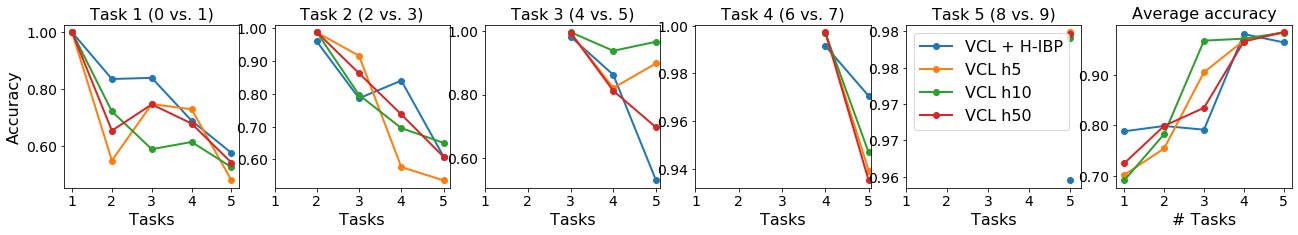

In [257]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='VCL + H-IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result[:, i]))+1, _vcl_result[:, i], label='VCL h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='VCL + H-IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result, label='VCL h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/hibp_normal_all.pdf", bbox_inches='tight')
fig.show()

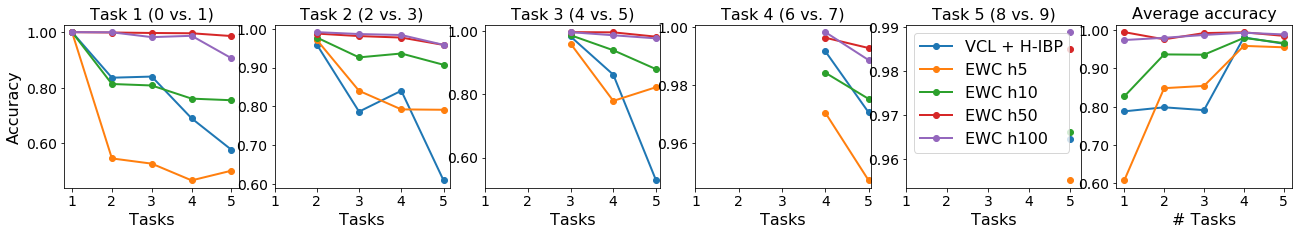

In [258]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='VCL + H-IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h5[:, i]))+1, _ewc_h5[:, i], label='EWC h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h10[:, i]))+1, _ewc_h10[:, i], label='EWC h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h50[:, i]))+1, _ewc_h50[:, i], label='EWC h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ewc_h100[:, i]))+1, _ewc_h100[:, i], label='EWC h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='VCL + H-IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h5))+1, __ewc_h5, label='EWC h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h10))+1, __ewc_h10, label='EWC h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h50))+1, __ewc_h50, label='EWC h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ewc_h100))+1, __ewc_h100, label='EWC h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(__hibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/hibp_vs_ewc_normal_all.pdf", bbox_inches='tight')
fig.show()

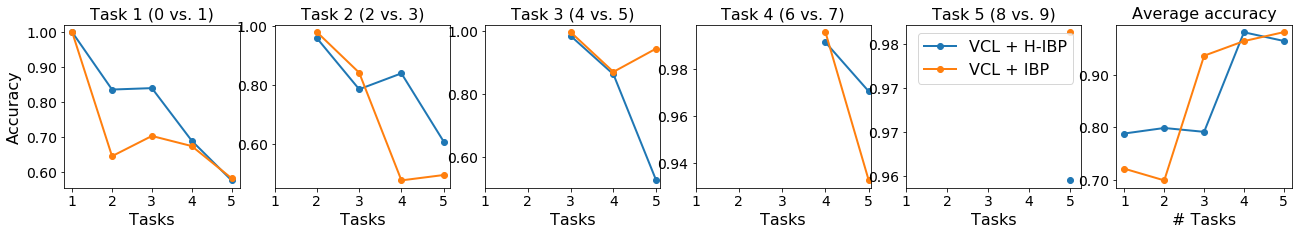

In [259]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='VCL + H-IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='VCL + IBP', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='VCL + H-IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='VCL + IBP', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/hibp_vs_ibp_normal_all.pdf", bbox_inches='tight')
fig.show()

In [260]:
print("Overall accuracies H-IBP: {0} pm {1}".format(np.nanmean(hibp_acc), np.nanmean(np.nanstd(hibp_acc, 0))))
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h10: {0} pm {1}".format(np.nanmean(vcl_result), np.nanmean(np.nanstd(vcl_result, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))

Overall accuracies H-IBP: 0.8290147964928097 pm 0.06062457742019648
Overall accuracies IBP: 0.8079037513294365 pm 0.06861495583701144
Overall accuracies VCL h5: 0.8106542539356661 pm 0.08769670330499996
Overall accuracies VCL h10: 0.8276488591940505 pm 0.07387120243082144
Overall accuracies VCL h50: 0.8159615739375855 pm 0.11192304990379552


/nfs/home/samuelk/anaconda2/envs/py36/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [261]:
print("Overall accuracies EWC h5: {0} pm {1}".format(np.nanmean(_ewc_h5), np.nanmean(np.nanstd(ewc_h5, 0))))
print("Overall accuracies EWC h10: {0} pm {1}".format(np.nanmean(_ewc_h10), np.nanmean(np.nanstd(ewc_h10, 0))))
print("Overall accuracies EWC h50: {0} pm {1}".format(np.nanmean(_ewc_h50), np.nanmean(np.nanstd(ewc_h50, 0))))
print("Overall accuracies EWC h100: {0} pm {1}".format(np.nanmean(_ewc_h100), np.nanmean(np.nanstd(ewc_h100, 0))))

Overall accuracies EWC h5: 0.7913394615849696 pm 0.06748048543195853
Overall accuracies EWC h10: 0.907657726415752 pm 0.07974607658494805
Overall accuracies EWC h50: 0.9886095980702618 pm 0.00642349555779178
Overall accuracies EWC h100: 0.9819085263511641 pm 0.015068414317902347


In [154]:
Z_hibp = d['Z'][0]
len(Z_hibp)

10

In [155]:
Z_hibp[0].shape

(1, 2115, 100)

In [156]:
Z_ibp = d_baselines['Z']
len(Z_ibp[0])

10

In [157]:
##### Box plot params

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 14
legend_size = 16

num_layers = 2
num_tasks = 5
ticks = [str(i) for i in np.arange(5)+1]
fig_size=(6, 5)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color='black', lw=1.5)
    plt.setp(bp['whiskers'], color='black', lw=1.5)
    plt.setp(bp['caps'], color=color, lw=2)
    plt.setp(bp['medians'], color=color, lw=2)

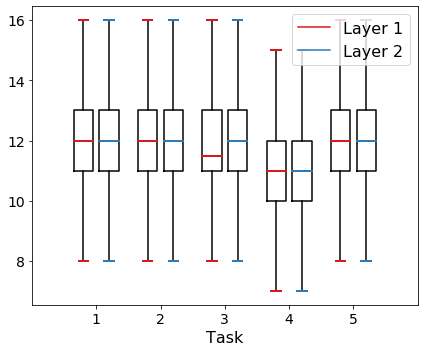

In [159]:
plt.figure(figsize=fig_size)
bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i + 1] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Layer 1')
plt.plot([], c='#2C7BB6', label='Layer 2')
plt.legend(fontsize=legend_size)

plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_normal_hibp.pdf', bbox_inches='tight')
plt.show()

In [160]:
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)

In [161]:
len(_Z_ibp)

10

In [162]:
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2115, 100)

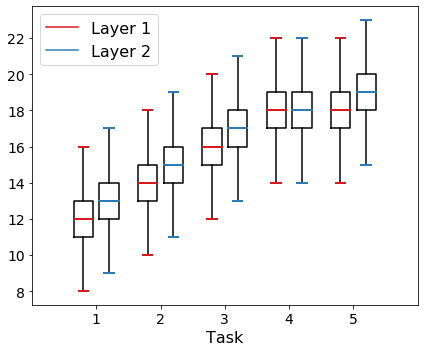

In [164]:
plt.figure(figsize=fig_size)
bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Layer 1')
plt.plot([], c='#2C7BB6', label='Layer 2')
plt.legend(fontsize=legend_size)

plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_normal_ibp.pdf', bbox_inches='tight')
plt.show()

# HIBP random

In [233]:
with open('results/split_mnist_res5_hibp_l2_random_optp.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50', 'uncerts_ibp', 'uncerts_vcl_h5', 'uncerts_vcl_h10', 'uncerts_vcl_h50', 'Z'])

In [234]:
with open('results/split_mnist_res5_random_l2_ibp.pkl', 'rb') as input_file:
    d_baselines = pickle.load(input_file)
d_baselines.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50', 'uncerts_ibp', 'uncerts_vcl_h5', 'uncerts_vcl_h10', 'uncerts_vcl_h50', 'Z'])

In [235]:
hibp_acc = d['vcl_ibp'] # 5, 5, 5
ibp_acc = d_baselines['vcl_ibp']
vcl_result = d_baselines['vcl_h10']
vcl_result_h5 = d_baselines['vcl_h5']
vcl_result_h50 = d_baselines['vcl_h50']
_hibp_acc = np.mean(hibp_acc, 0)
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result = np.mean(vcl_result, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
__hibp_acc = np.nanmean(hibp_acc, (0,1))
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result = np.nanmean(vcl_result, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))

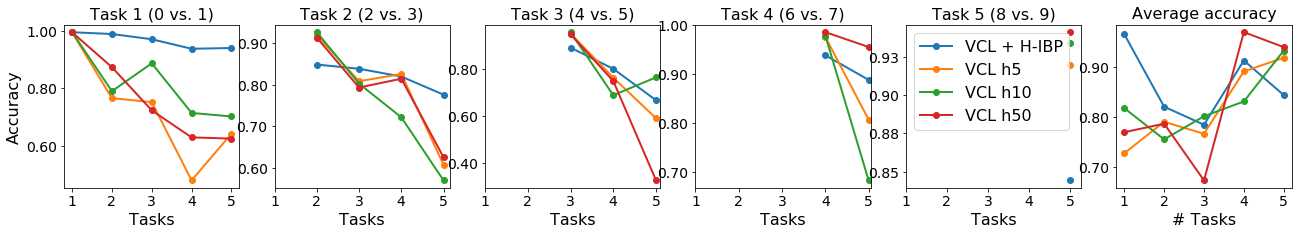

In [236]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='VCL + H-IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result[:, i]))+1, _vcl_result[:, i], label='VCL h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='VCL + H-IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result, label='VCL h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/hibp_random_all.pdf", bbox_inches='tight')
fig.show()

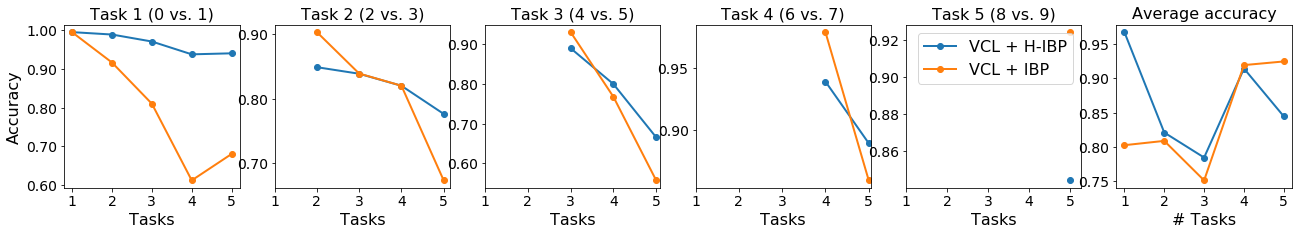

In [237]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='VCL + H-IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='VCL + IBP', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='VCL + H-IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='VCL + IBP', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/hibp_vs_ibp_random_all.pdf", bbox_inches='tight')
fig.show()

In [240]:
print("Overall accuracies H-IBP: {0} pm {1}".format(np.nanmean(hibp_acc), np.nanmean(np.nanstd(hibp_acc, 0))))
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h10: {0} pm {1}".format(np.nanmean(vcl_result), np.nanmean(np.nanstd(vcl_result, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))

Overall accuracies H-IBP: 0.8763537826992499 pm 0.03091786226396072
Overall accuracies IBP: 0.8176637574025757 pm 0.06931897269196059
Overall accuracies VCL h5: 0.7867254142596155 pm 0.0712170208242862
Overall accuracies VCL h10: 0.8075321851108355 pm 0.09478003021583416
Overall accuracies VCL h50: 0.7930456971134802 pm 0.028216992622058946


In [192]:
Z_hibp = d['Z'][0]
Z_ibp = d_baselines['Z']
len(Z_ibp[0])

10

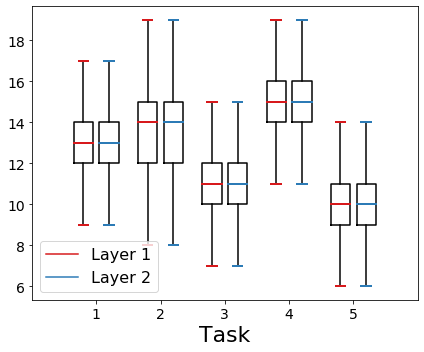

In [193]:
plt.figure(figsize=fig_size)
bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i + 1] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Layer 1')
plt.plot([], c='#2C7BB6', label='Layer 2')
plt.legend(fontsize=legend_size, loc='lower left')

plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_hibp_random.pdf', bbox_inches='tight')
plt.show()

In [194]:
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2185, 100)

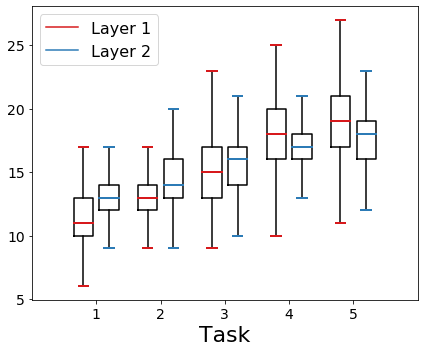

In [195]:
plt.figure(figsize=fig_size)
bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Layer 1')
plt.plot([], c='#2C7BB6', label='Layer 2')
plt.legend(fontsize=legend_size)

plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_ibp_random.pdf', bbox_inches='tight')
plt.show()

# HIBP background MNIST

In [241]:
with open('results/split_mnist_res5_hibp_l2_background_optp.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50', 'uncerts_ibp', 'uncerts_vcl_h5', 'uncerts_vcl_h10', 'uncerts_vcl_h50', 'Z'])

In [242]:
with open('results/split_mnist_res5_background_l2_ibp.pkl', 'rb') as input_file:
    d_baselines = pickle.load(input_file)
d_baselines.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50', 'uncerts_ibp', 'uncerts_vcl_h5', 'uncerts_vcl_h10', 'uncerts_vcl_h50', 'Z'])

In [243]:
hibp_acc = d['vcl_ibp'] # 5, 5, 5
ibp_acc = d_baselines['vcl_ibp']
vcl_result = d_baselines['vcl_h10']
vcl_result_h5 = d_baselines['vcl_h5']
vcl_result_h50 = d_baselines['vcl_h50']
_hibp_acc = np.mean(hibp_acc, 0)
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result = np.mean(vcl_result, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
__hibp_acc = np.nanmean(hibp_acc, (0,1))
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result = np.nanmean(vcl_result, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))

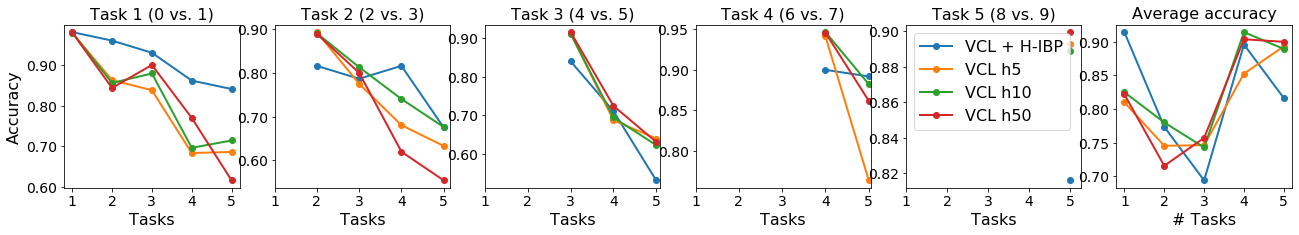

In [244]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='VCL + H-IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result[:, i]))+1, _vcl_result[:, i], label='VCL h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='VCL + H-IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result, label='VCL h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/hibp_background_all.pdf", bbox_inches='tight')
fig.show()

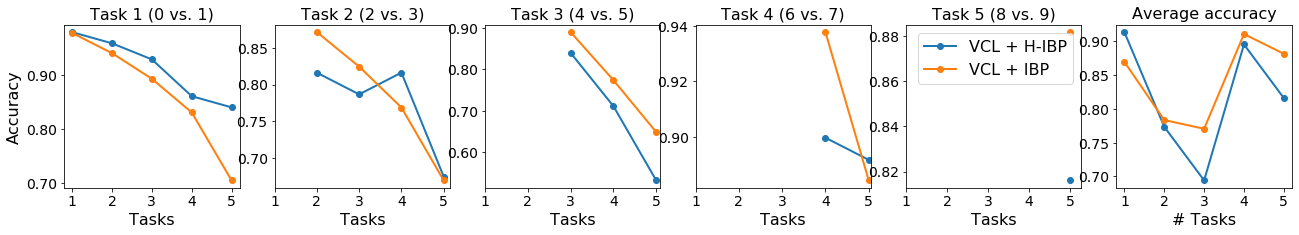

In [245]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='VCL + H-IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='VCL + IBP', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='VCL + H-IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='VCL + IBP', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/hibp_vs_ibp_background_all.pdf", bbox_inches='tight')
fig.show()

In [247]:
print("Overall accuracies H-IBP: {0}, pm {1}".format(np.nanmean(hibp_acc), np.nanmean(np.nanstd(hibp_acc, 0))))
print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h10: {0} pm {1}".format(np.nanmean(vcl_result), np.nanmean(np.nanstd(vcl_result, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))

Overall accuracies H-IBP: 0.8234941344414664, pm 0.025428950346337555
Overall accuracies IBP: 0.8332003724721112, pm 0.0579081914394346
Overall accuracies VCL h5: 0.7910886091208469 pm 0.07051620687953489
Overall accuracies VCL h10: 0.812618901801068 pm 0.045713216871249726
Overall accuracies VCL h50: 0.7965673047007074 pm 0.051016545221397286


In [182]:
Z_hibp = d['Z'][0]
Z_ibp = d_baselines['Z']
len(Z_ibp[0])

10

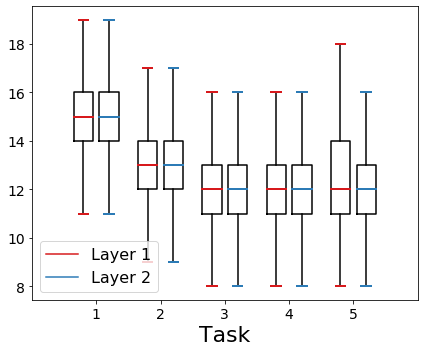

In [183]:
plt.figure(figsize=fig_size)
bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i + 1] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Layer 1')
plt.plot([], c='#2C7BB6', label='Layer 2')
plt.legend(fontsize=legend_size, loc='lower left')

plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_hibp_background.pdf', bbox_inches='tight')
plt.show()

In [184]:
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2126, 100)

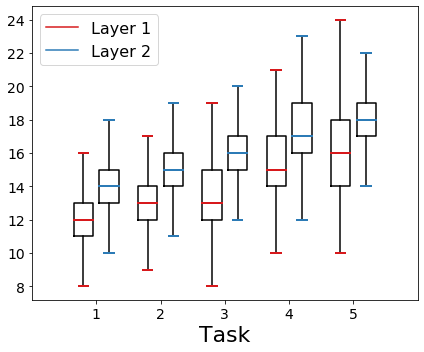

In [185]:
plt.figure(figsize=fig_size)
bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Layer 1')
plt.plot([], c='#2C7BB6', label='Layer 2')
plt.legend(fontsize=legend_size)

plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_ibp_background.pdf', bbox_inches='tight')
plt.show()

## Random search

In [288]:
with open('results/split_mnist_res5_ibp_rs_split_normal_rs_normal_hibp_l2.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50', 'uncerts_ibp', 'uncerts_vcl_h5', 'uncerts_vcl_h10', 'uncerts_vcl_h50', 'Z', 'opt_params'])

In [289]:
d['opt_params']

{'batch_size': 512.0,
 'learning_rate': 5.8711829608879356e-05,
 'alpha0': 4.282103220702032,
 'lambda_1': 0.5182856575835971,
 'lambda_2': 0.6757795832665403,
 'prior_var': 0.6936210421939443,
 'alpha': 4.006835898828951,
 'ibp_samples': 10.0,
 'no_pred_samples': 100.0,
 'prior_mean': 0.0,
 'beta0': 1.0}

In [290]:
hibp_acc = d['vcl_ibp'] # 5, 5, 5
vcl_result_h10 = d['vcl_h10']
vcl_result_h5 = d['vcl_h5']
vcl_result_h50 = d['vcl_h50']
_hibp_acc = np.mean(hibp_acc, 0)
_vcl_result_h10 = np.mean(vcl_result_h10, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
__hibp_acc = np.nanmean(hibp_acc, (0,1))
__vcl_result_h10 = np.nanmean(vcl_result_h10, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))

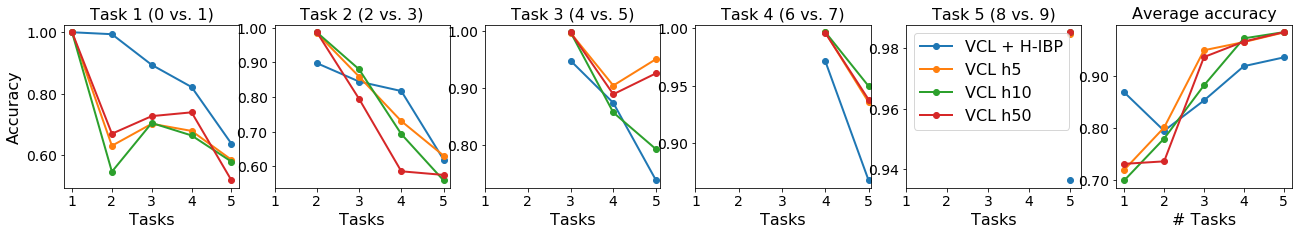

In [291]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='VCL + H-IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h10[:, i]))+1, _vcl_result_h10[:, i], label='VCL h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='VCL + H-IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h10, label='VCL h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/hibp_sh_normal_all.pdf", bbox_inches='tight')
fig.show()

# CL2

# Normal

In [265]:
with open('results/split_mnist_res5_hibp_sh_l2_normal.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50', 'vcl_h100', 'uncerts_ibp', 'uncerts_vcl_h5', 'uncerts_vcl_h10', 'uncerts_vcl_h50', 'uncerts_vcl_h100', 'Z'])

In [266]:
hibp_acc = d['vcl_ibp'] # 5, 5, 5
vcl_result_h10 = d['vcl_h10']
vcl_result_h5 = d['vcl_h5']
vcl_result_h50 = d['vcl_h50']
vcl_result_h100 = d['vcl_h100']
_hibp_acc = np.mean(hibp_acc, 0)
_vcl_result_h10 = np.mean(vcl_result_h10, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
__hibp_acc = np.nanmean(hibp_acc, (0,1))
__vcl_result_h10 = np.nanmean(vcl_result_h10, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

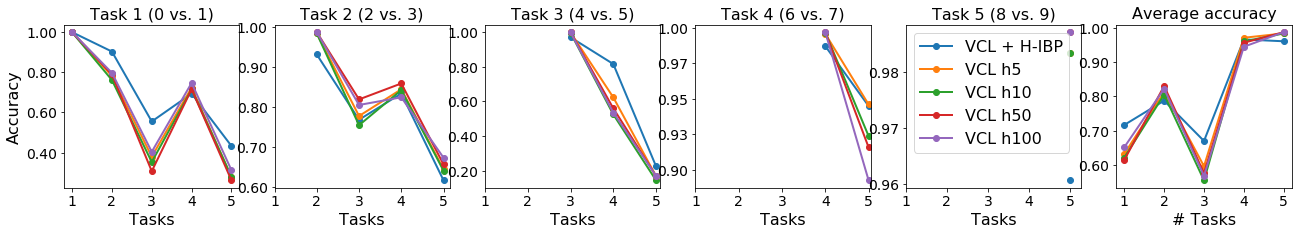

In [268]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='VCL + H-IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h10[:, i]))+1, _vcl_result_h10[:, i], label='VCL h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='VCL + H-IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h10, label='VCL h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/hibp_sh_normal_all.pdf", bbox_inches='tight')
fig.show()

In [269]:
print("Overall accuracies H-IBP: {0}, pm {1}".format(np.nanmean(hibp_acc), np.nanmean(np.nanstd(hibp_acc, 0))))
#print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h10: {0} pm {1}".format(np.nanmean(vcl_result_h10), np.nanmean(np.nanstd(vcl_result_h10, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies H-IBP: 0.7758136536467443, pm 0.027499271731003323
Overall accuracies VCL h5: 0.7417975661447573 pm 0.035257459750905745
Overall accuracies VCL h10: 0.7266576508001372 pm 0.030389133590039415
Overall accuracies VCL h50: 0.734899349705682 pm 0.028226353019429943
Overall accuracies VCL h100: 0.742063141815507 pm 0.04353032476117332


In [270]:
Z_hibp = d['Z'][0]
#Z_ibp = d_baselines['Z']
#len(Z_ibp[0])

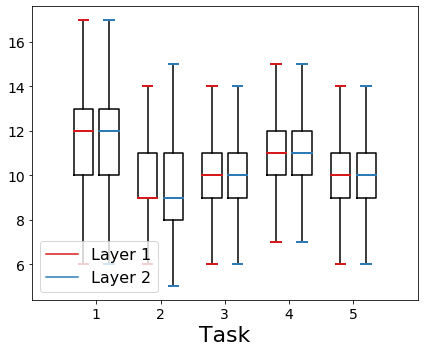

In [271]:
plt.figure(figsize=fig_size)
bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i + 1] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Layer 1')
plt.plot([], c='#2C7BB6', label='Layer 2')
plt.legend(fontsize=legend_size, loc='lower left')

plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_hibp_sh_normal.pdf', bbox_inches='tight')
plt.show()

# Noise

In [272]:
with open('results/split_mnist_res5_hibp_sh_l2_random.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50', 'vcl_h100', 'uncerts_ibp', 'uncerts_vcl_h5', 'uncerts_vcl_h10', 'uncerts_vcl_h50', 'uncerts_vcl_h100', 'Z'])

In [273]:
hibp_acc = d['vcl_ibp'] # 5, 5, 5
vcl_result_h10 = d['vcl_h10']
vcl_result_h5 = d['vcl_h5']
vcl_result_h50 = d['vcl_h50']
vcl_result_h100 = d['vcl_h100']
_hibp_acc = np.mean(hibp_acc, 0)
_vcl_result_h10 = np.mean(vcl_result_h10, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
__hibp_acc = np.nanmean(hibp_acc, (0,1))
__vcl_result_h10 = np.nanmean(vcl_result_h10, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

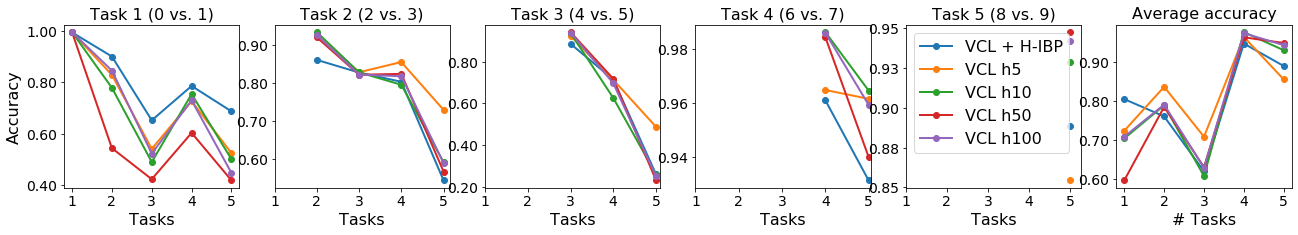

In [274]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='VCL + H-IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h10[:, i]))+1, _vcl_result_h10[:, i], label='VCL h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='VCL + H-IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h10, label='VCL h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/hibp_sh_random_all.pdf", bbox_inches='tight')
fig.show()

In [275]:
print("Overall accuracies H-IBP: {0}, pm {1}".format(np.nanmean(hibp_acc), np.nanmean(np.nanstd(hibp_acc, 0))))
#print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h10: {0} pm {1}".format(np.nanmean(vcl_result_h10), np.nanmean(np.nanstd(vcl_result_h10, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies H-IBP: 0.7798286850535016, pm 0.03231180803465022
Overall accuracies VCL h5: 0.7906817755313313 pm 0.06435097149982151
Overall accuracies VCL h10: 0.7580344999939003 pm 0.04374172685759774
Overall accuracies VCL h50: 0.7251650644612202 pm 0.06376869535001699
Overall accuracies VCL h100: 0.7646890920438502 pm 0.015374166509181717


/nfs/home/samuelk/anaconda2/envs/py36/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [276]:
Z_hibp = d['Z'][0]
#Z_ibp = d_baselines['Z']
#len(Z_ibp[0])

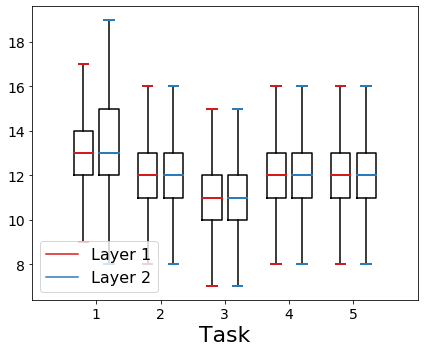

In [277]:
plt.figure(figsize=fig_size)
bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i + 1] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Layer 1')
plt.plot([], c='#2C7BB6', label='Layer 2')
plt.legend(fontsize=legend_size, loc='lower left')

plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_hibp_sh_random.pdf', bbox_inches='tight')
plt.show()

# Background

In [281]:
with open('results/split_mnist_res5_hibp_sh_l2_background.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50', 'vcl_h100', 'uncerts_ibp', 'uncerts_vcl_h5', 'uncerts_vcl_h10', 'uncerts_vcl_h50', 'uncerts_vcl_h100', 'Z'])

In [282]:
hibp_acc = d['vcl_ibp'] # 5, 5, 5
vcl_result_h10 = d['vcl_h10']
vcl_result_h5 = d['vcl_h5']
vcl_result_h50 = d['vcl_h50']
vcl_result_h100 = d['vcl_h100']
_hibp_acc = np.mean(hibp_acc, 0)
_vcl_result_h10 = np.mean(vcl_result_h10, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
__hibp_acc = np.nanmean(hibp_acc, (0,1))
__vcl_result_h10 = np.nanmean(vcl_result_h10, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

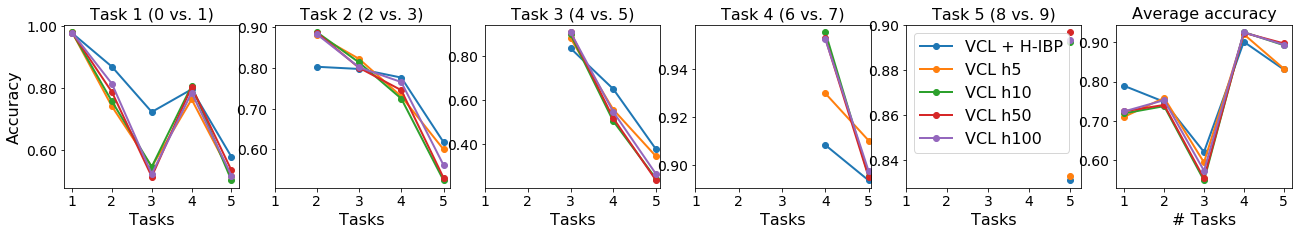

In [283]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='VCL + H-IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h10[:, i]))+1, _vcl_result_h10[:, i], label='VCL h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='VCL + H-IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h10, label='VCL h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/hibp_sh_background_all.pdf", bbox_inches='tight')
fig.show()

In [285]:
print("Overall accuracies H-IBP: {0}, pm {1}".format(np.nanmean(hibp_acc), np.nanmean(np.nanstd(hibp_acc, 0))))
#print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h10: {0} pm {1}".format(np.nanmean(vcl_result_h10), np.nanmean(np.nanstd(vcl_result_h10, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies H-IBP: 0.7621967965355542, pm 0.04301222209307908
Overall accuracies VCL h5: 0.7360931291557475 pm 0.07982465056865537
Overall accuracies VCL h10: 0.7289528955606037 pm 0.027479399955296156
Overall accuracies VCL h50: 0.7326519357062492 pm 0.011938274345135566
Overall accuracies VCL h100: 0.7396525908268294 pm 0.016952819770314223


/nfs/home/samuelk/anaconda2/envs/py36/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [286]:
Z_hibp = d['Z'][0]
#Z_ibp = d_baselines['Z']
#len(Z_ibp[0])

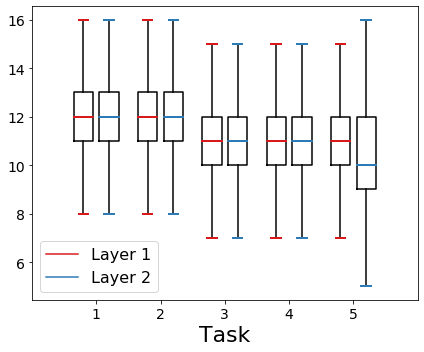

In [287]:
plt.figure(figsize=fig_size)
bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i + 1] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Layer 1')
plt.plot([], c='#2C7BB6', label='Layer 2')
plt.legend(fontsize=legend_size, loc='lower left')

plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_hibp_sh_background.pdf', bbox_inches='tight')
plt.show()